In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Ddata Importing

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
y_factor_name='stroke';
moved_column = df.pop(y_factor_name)
df[y_factor_name] = moved_column
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Data Cleaning

In [3]:

# Calculate the mean of the 'bmi' column in the 'data' dataframe
# Fill in missing values in the 'bmi' column with the mean value using the 'fillna' method
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(value=mean_bmi, inplace=True)
print(f'Number of missing values in "bmi" column: {df["bmi"].isnull().sum()}')

Number of missing values in "bmi" column: 0


In [4]:
scaler = StandardScaler()
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [5]:
label_encoder = preprocessing.LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['gender'])
df['Married'] = label_encoder.fit_transform(df['ever_married'])
df['Employment'] = label_encoder.fit_transform(df['work_type'])
df['Residency'] = label_encoder.fit_transform(df['Residence_type'])
df['Smoker'] = label_encoder.fit_transform(df['smoking_status'])
df.head()
df.drop('id', axis=1, inplace=True)

In [6]:
df = df.drop(['gender','ever_married','work_type','Residence_type', 'smoking_status'], axis=1)

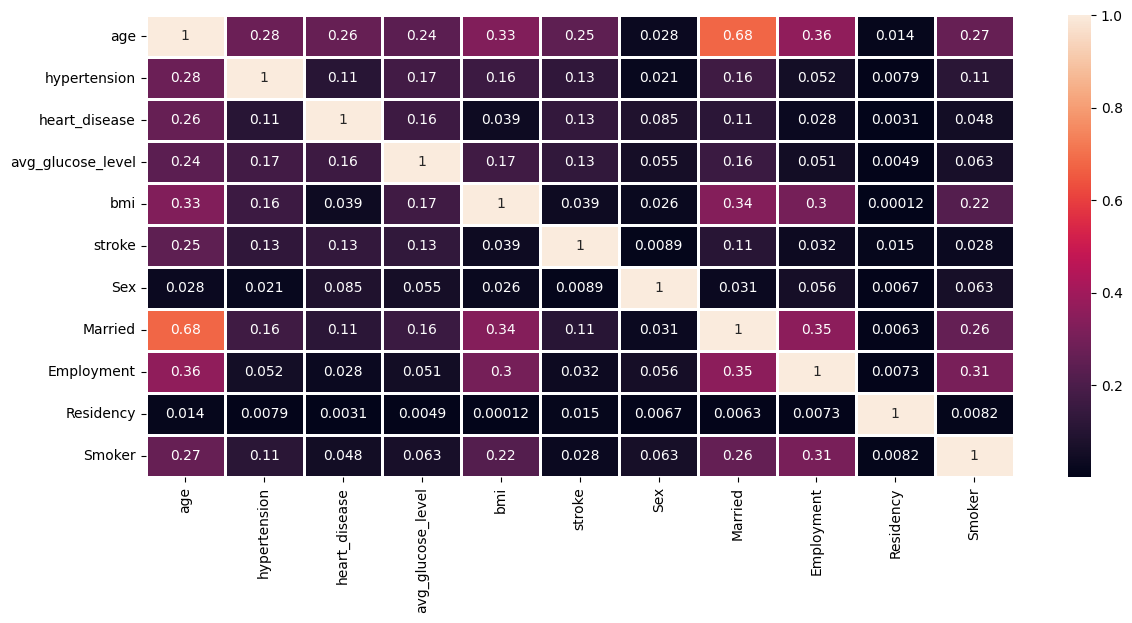

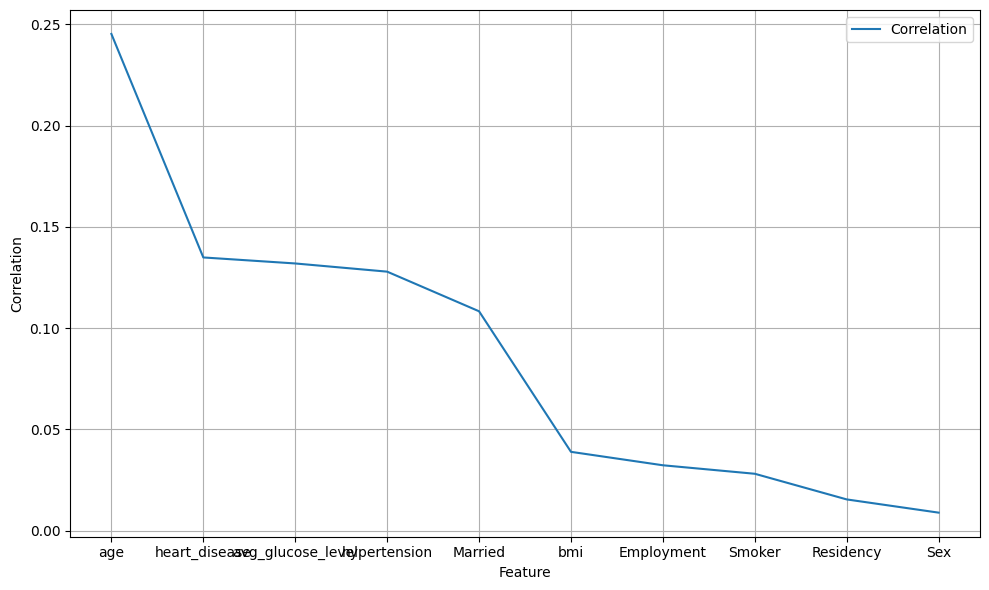

In [7]:
# check correlation
# Calculate correlation matrix and visualize as heatmap
plt.figure(figsize=(14,6))
corr=abs(df.corr())
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()
# Plot feature correlations with target variable
plt.figure(figsize=(10,6))
plt.plot(corr["stroke"].sort_values(ascending=False)[1:],label="Correlation")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
df.head()
total_tuples = df.shape[0]
print("Total number of tuples:", total_tuples)
num_strokes = df['stroke'].sum()
print("Total number of tuples with stroke True:", num_strokes)
num_strokes = df['stroke'].sum()
print("Total number of tuples with not stroke False:", total_tuples-num_strokes)

Total number of tuples: 5110
Total number of tuples with stroke True: 249
Total number of tuples with not stroke False: 4861


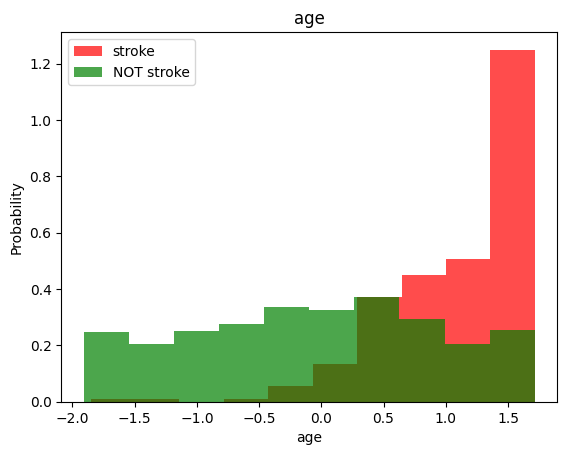

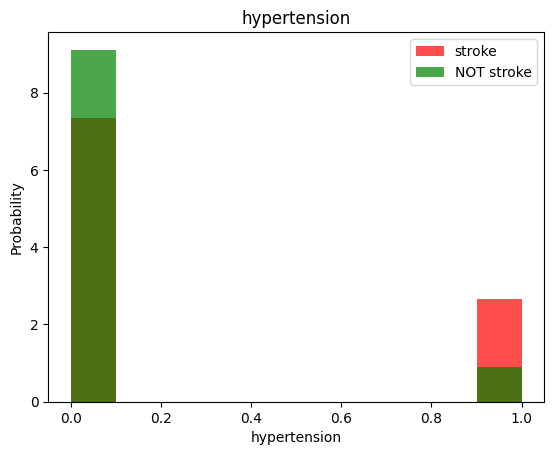

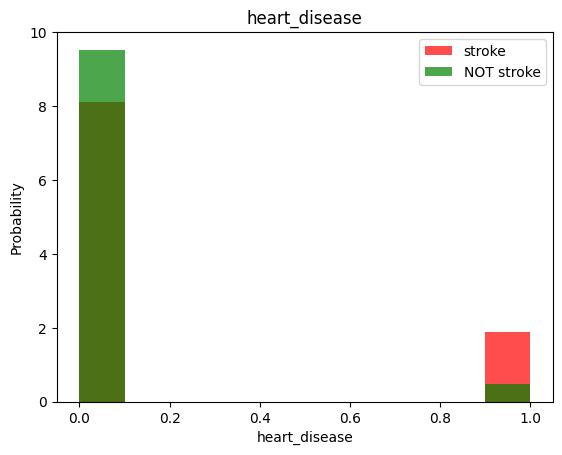

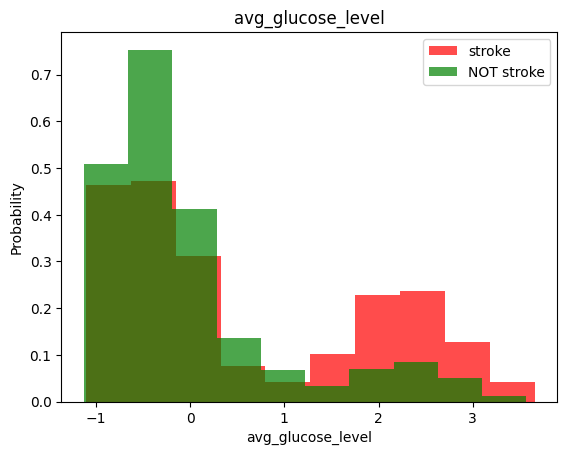

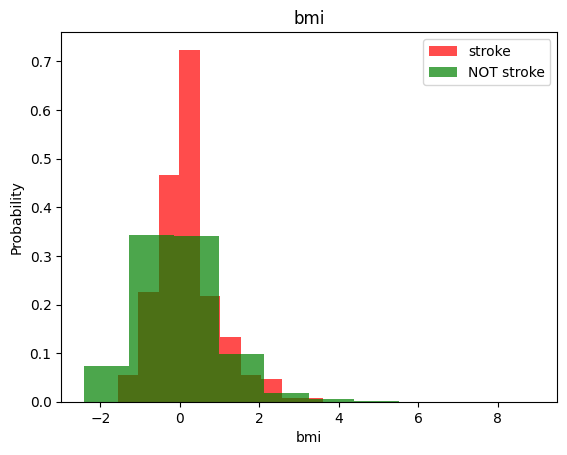

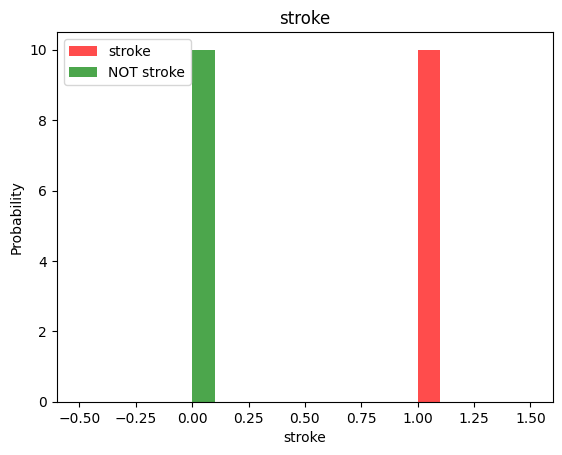

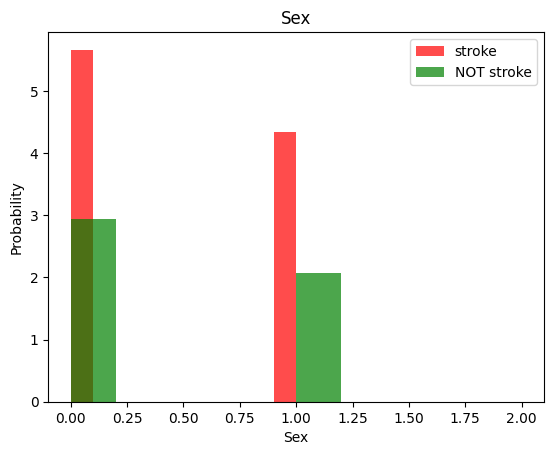

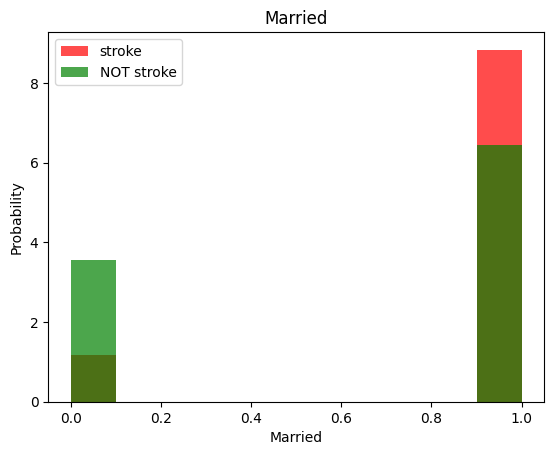

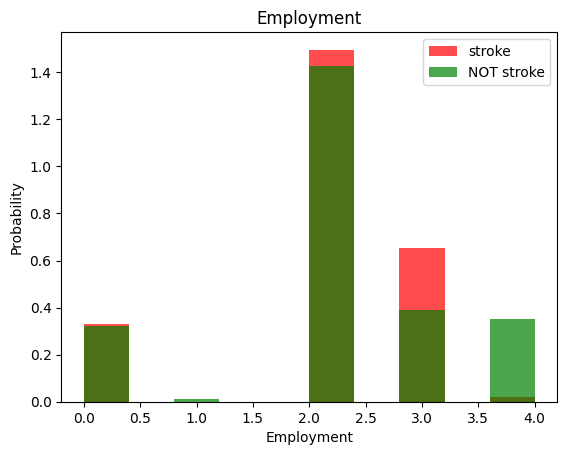

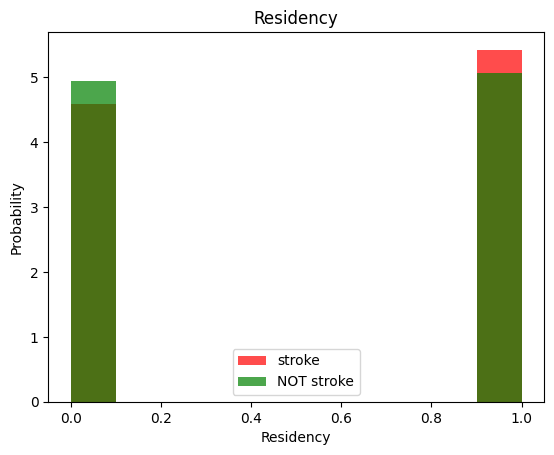

In [9]:
for label in df.columns[:-1]:
  plt.hist(df[df[y_factor_name]==1][label],color = 'red',label=y_factor_name,alpha = 0.7 ,density=True)
  plt.hist(df[df[y_factor_name]==0][label],color = 'green',label='NOT '+y_factor_name,alpha = 0.7 ,density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [10]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [11]:
print(len(train[train[y_factor_name]==1]))
print(len(train[train[y_factor_name]==0]))

155
2911


STRANDSCALLAR

In [12]:
# Define a function that takes a dataset and a threshold value as inputs and returns the set of all names of correlated columns
def correlation(dataset, threshold):
    # Initialize an empty set to store the names of correlated columns
    col_corr = set()

    # Calculate the correlation matrix for the dataset using the 'corr' method
    corr_matrix = dataset.corr()

    # Iterate over the columns of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Check if the absolute value of the correlation coefficient is greater than the threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # If it is, add the name of the column to the set of correlated columns
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    # Return the set of correlated column names
    return col_corr

In [13]:
corr_features = correlation(df, 0.35)

In [14]:
x_corr = df.drop(corr_features,axis=1)
x_corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Sex,Residency,Smoker
0,1.051434,0,1,2.706375,1.001234e+00,1,1,1,1
1,0.786070,0,0,2.121559,4.615554e-16,1,0,0,2
2,1.626390,0,1,-0.005028,4.685773e-01,1,1,0,2
3,0.255342,0,0,1.437358,7.154182e-01,1,0,1,3
4,1.582163,1,0,1.501184,-6.357112e-01,1,0,0,2
...,...,...,...,...,...,...,...,...,...
5105,1.626390,1,0,-0.494658,4.615554e-16,0,0,1,2
5106,1.670617,0,0,0.420775,1.442949e+00,0,0,1,2
5107,-0.363842,0,0,-0.511443,2.217363e-01,0,0,0,2
5108,0.343796,0,0,1.328257,-4.278451e-01,0,1,0,1


In [15]:


# drop the 'Stroke' column from the DataFrame to create the feature matrix
x = df.drop('stroke', axis=1)
# create the target vector
y = df['stroke']
# split the data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x_corr, y, test_size=0.3, stratify=y, random_state=42)
# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [16]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Fit the SMOTE object to the training data and oversample the minority class
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

KNN ( k-nearest neighbors )

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [18]:
print(x_train_smote);

           age  hypertension  heart_disease  avg_glucose_level           bmi  \
0     0.388024             0              0           0.037375 -8.955437e-01   
1     0.830297             0              0          -0.393728  9.622591e-01   
2     1.670617             0              1          -0.235377  6.583678e-02   
3     0.520706             0              0          -0.719486 -1.160460e-01   
4    -0.275387             0              0          -0.054941  9.362759e-01   
...        ...           ...            ...                ...           ...   
6801  0.616179             0              0          -0.381230 -1.485357e-01   
6802  0.158609             0              0          -0.563638  1.896394e-01   
6803  1.645757             0              0          -0.412192  6.321737e-02   
6804  1.420791             0              0          -0.751196  4.615554e-16   
6805  1.317131             1              0           2.498649  4.169074e-02   

      stroke  Sex  Residency  Smoker  


In [19]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=4)

In [20]:
y_pred = knn_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1458
           1       0.97      0.93      0.95        75

    accuracy                           1.00      1533
   macro avg       0.98      0.97      0.97      1533
weighted avg       1.00      1.00      1.00      1533



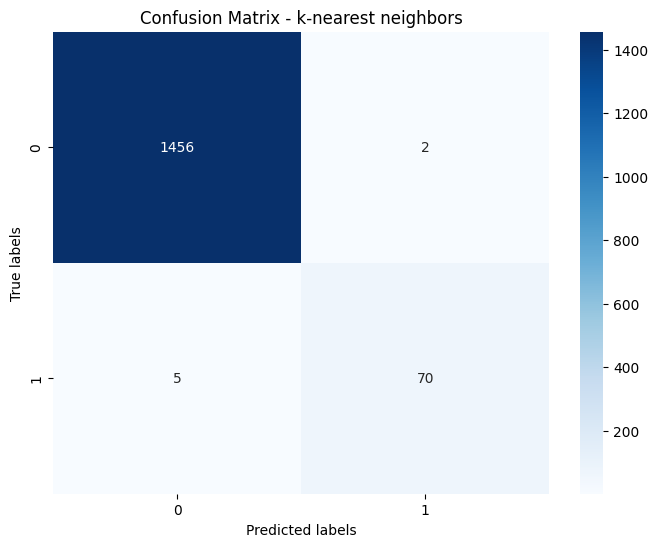

In [21]:
print(classification_report(y_test,y_pred))
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - k-nearest neighbors")
plt.show()

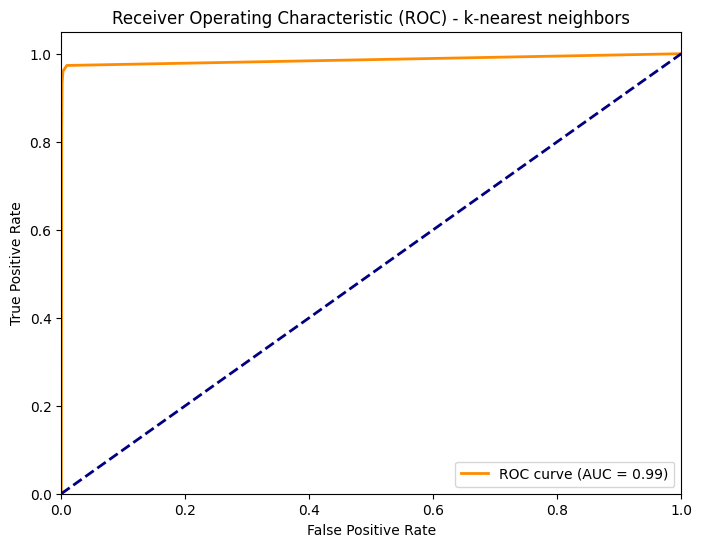

In [22]:
# Get predicted probabilities for the positive class
y_prob = knn_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - k-nearest neighbors')
plt.legend(loc="lower right")
plt.show()

LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LR = LogisticRegression()
LR.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [25]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train_smote,y_train_smote)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1458
           1       1.00      1.00      1.00        75

    accuracy                           1.00      1533
   macro avg       1.00      1.00      1.00      1533
weighted avg       1.00      1.00      1.00      1533



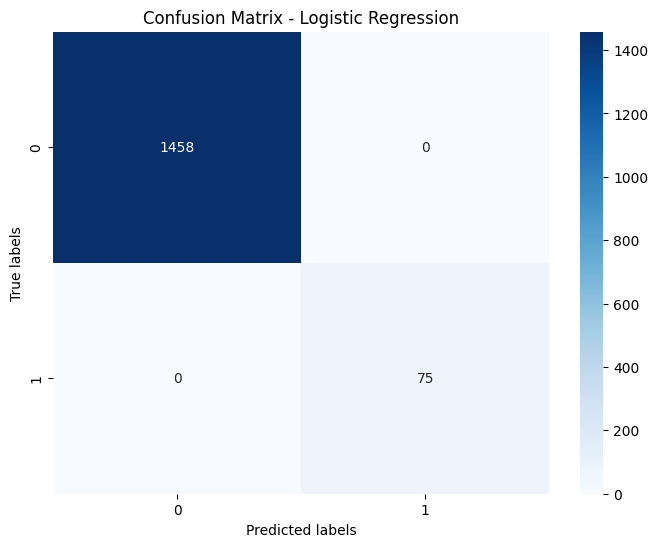

In [26]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

SVM  ( Support vector machines )

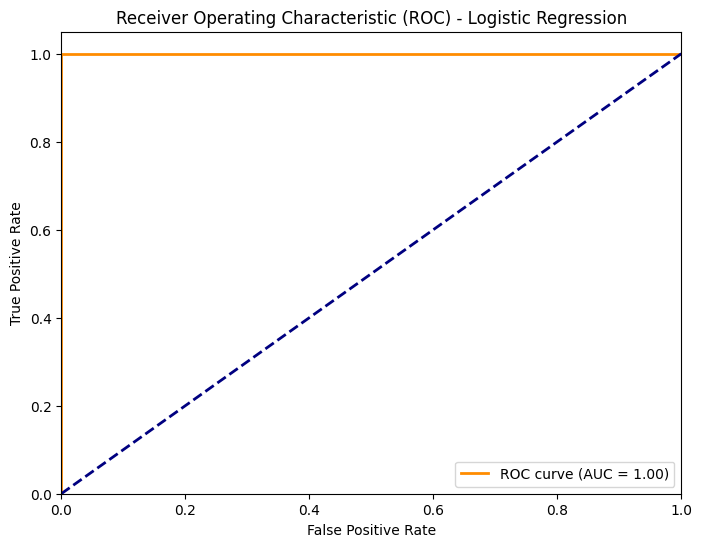

In [27]:
# Get predicted probabilities for the positive class
y_prob = lg_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [28]:
from sklearn.svm import SVC


In [ ]:
svm_model = SVC(probability=True, random_state=42)
svm_model = svm_model.fit(x_train_smote, y_train_smote)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))



# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix of Support vector machines")
plt.show()

In [ ]:
# Get predicted probabilities for the positive class
y_prob = svm_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Support vector machines')
plt.legend(loc="lower right")
plt.show()